# Lab 4:
**Objective:**

Building Linear Regression model for given dataset.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing


In [10]:
df = pd.read_csv("/content/drive/MyDrive/DA_datasets/Exp4/climate_change.csv")
df.rename(columns={'CFC-12':'CFC_12', 'CFC-11': 'CFC_11'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC_11    308 non-null    float64
 7   CFC_12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


In [11]:
df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC_11      0
CFC_12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [12]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [13]:
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


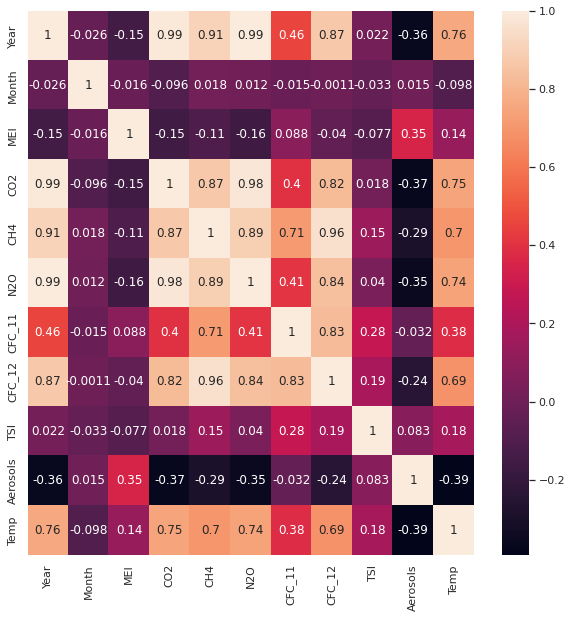

In [14]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df.corr(), annot=True)

In [15]:
fig = px.bar(df, x="Month", y="MEI", hover_data=['Year'])
fig.show()

In [16]:
df1 = df.sort_values('Year')

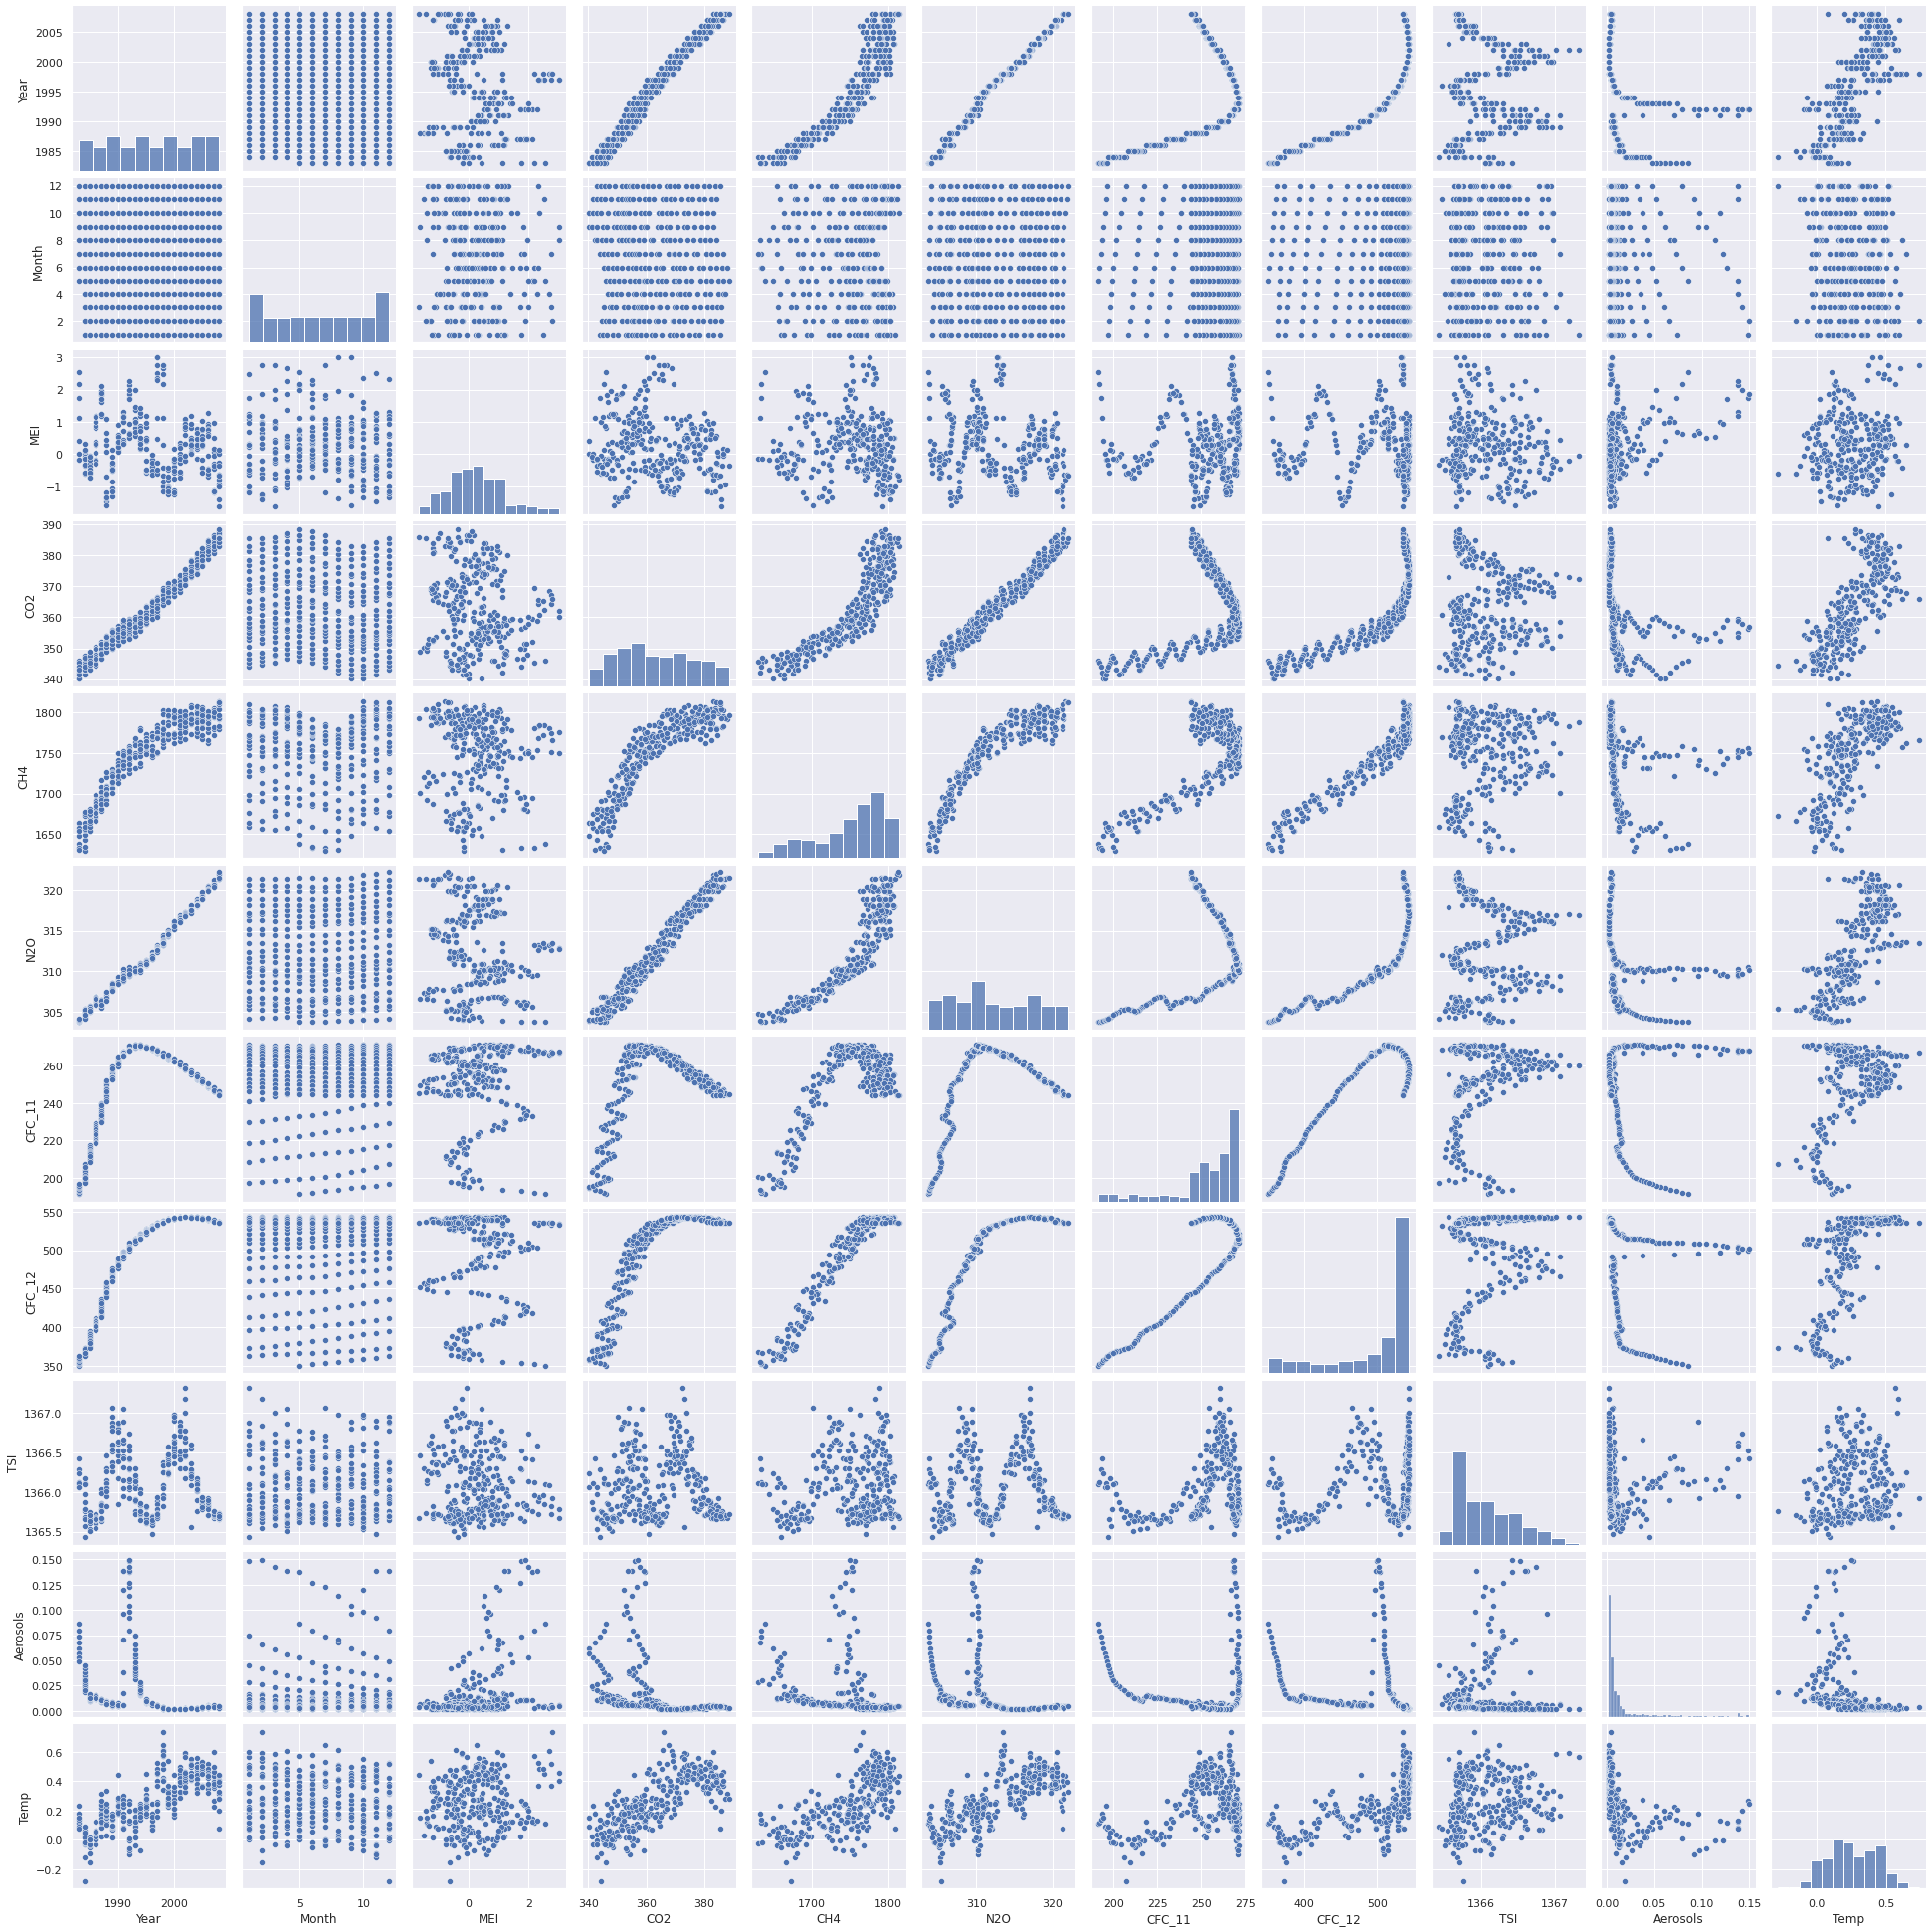

In [17]:
sns.pairplot(df1)

In [18]:
fig = px.bar(df1, x='Year', y='Temp')
fig.show()

In [19]:
fig = px.box(df1, x='CFC_11')
fig.show()

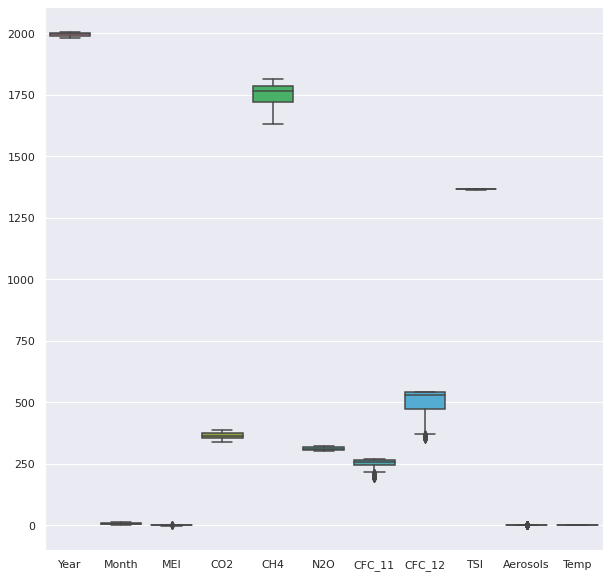

In [20]:
sns.boxplot(data=df1)

In [21]:
from scipy import stats
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [22]:
fig = px.box(df1, x='CFC_12')
fig.show()

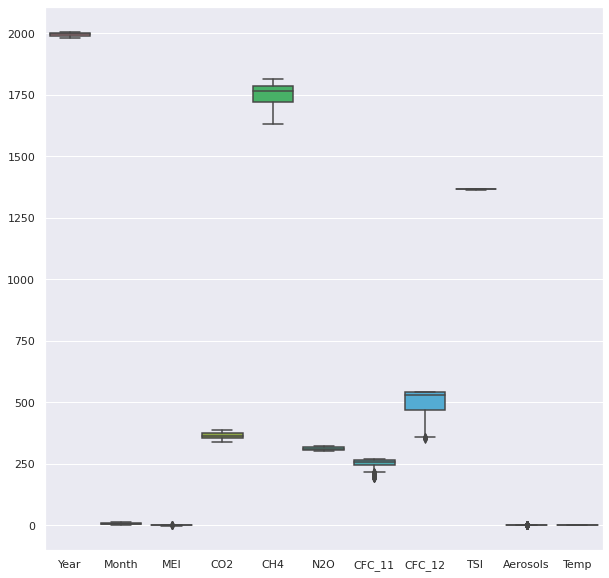

In [23]:
sns.boxplot(data=df1)

In [24]:
fig = px.box(df1, x='Temp')
fig.show()

In [25]:
# df1 = df1.drop(columns=['N2O'], axis=1)

As N2O and CO2 have same distribution, ignoring N2O

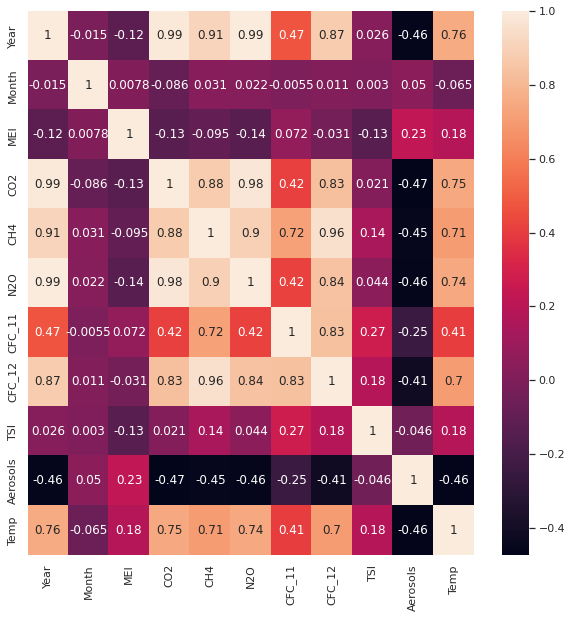

In [26]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df1.corr(), annot=True)

In [28]:
pip install sklearn

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df1[list(df1.columns)], df1['Temp'], test_size=0.2, random_state=42)

In [35]:
X_train.to_csv("/content/drive/MyDrive/DA_datasets/Exp4/modified_climate_change.csv")

In [36]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

In [37]:
variables = ['CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df1[variables], df1['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)

In [39]:
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [ 0.00355657 -2.26505733 -0.00600911  0.06157488  0.07658244]
Intercept:  -104.600041015014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [40]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  74.55475436593422


In [41]:
# from scipy import stats
dft = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [42]:
variables = ['Aerosols', 'N2O', 'MEI', 'TSI']
X_train, X_test, y_train, y_test = train_test_split(dft[variables], dft['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [-2.18371947  0.02399865  0.06611947  0.07758969]
Intercept:  -113.21600162171521


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [43]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR)*100)

 The Score Linear Regression  63.38409995422505


<b>Conclusion:</b><br>
<b>Problem 1.2</b><br>
From performing analysis of the results obtained from tests performed in SAS software, We can observe that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' gives the p-value below than 0.05. Hence, this variables are significant in model. <br>
<b>Problem 2.1</b><br>
simplest correct explanation for this contradiction is that All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. We can conclude this as, I tried removing/adding some of the variables and observed different values of coefficient indicating its dependence on values of coefficient of other variables.<br>
The variables CO2, CH4, CFC_12 and Temp are having high correlation with N20 (absolute correlation greater than 0.7)<br>
The variables CH4, CFC_12 are having high correlation with CFC_11 (absolute correlation greater than 0.7)<br>
<b>Problem 3</b><br>
The coefficient of N2O in this reduced model is 0.02399865.<br>
The r2 value obtained by this model is 0.6338 which is quiet low. Also, the previous model had no N2O variable as its independent variable.

